Type 0 to see original image. 
Type 1 to see filtered image. 1
Image array shape: (375, 500, 3)


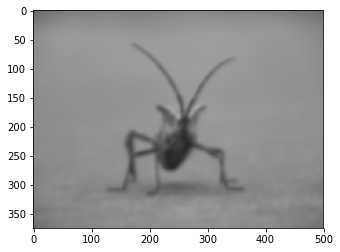

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# Import image
img = mpimg.imread('https://raw.githubusercontent.com/matplotlib/matplotlib.github.com/master/_images/stinkbug.png')

# Propmt user to choose whether to see original image or filtered image.
option  = input("Type 0 to see original image. \nType 1 to see filtered image. ")
while option != '0' and option != '1':
    option = input("Please only enter either '1' or '0'")

# Check type and shape
print("Image array shape: {}".format(img.shape))

# Function that replaces the RGB component of a pixel in the picture with the average RGB value
# of its neighbouring four pixels.
def filt(x):
    c = x.shape
    y = x
    for j in range(c[1]): # j corresponds to column number
        for i in range (c[0]): # i corresponds to row number
            #Corner cases
            if j == 0 and i == 0:
                y[i,j] = (x[i,j+1] + x[i+1,j])*(1/2) # Top left corner
            elif j == 0 and i == c[0] - 1:
                y[i,j] = (x[i,j+1] + x[i-1,j])*(1/2) # Bottom left corner
            elif i == 0 and j == c[1] - 1:
                y[i,j] = (x[i+1,j] + x[i, j-1])*(1/2) # Top right corner
            elif i == c[0] - 1 and j == c[1] - 1:
                y[i,j] = (x[i-1,j] + x[i, j-1])*(1/2) # Bottom right corner
            elif j == c[1] - 1:
                y[i,j] = (x[i+1,j] + x[i-1,j] + x[i, j-1])*(1/3) # Right edge
            elif i == c[0] - 1:
                y[i,j] = (x[i,j+1] + x[i-1,j] + x[i, j-1])*(1/3) # Bottom edge
            elif j == 0:
                y[i,j] = (x[i,j+1] + x[i+1,j] + x[i-1,j])*(1/3) # Left edge
            elif i == 0:
                y[i,j] = (x[i,j+1] + x[i+1,j] + x[i, j-1])*(1/3) # Top edge
            else:
                #Non-corner case
                y[i,j] = (x[i,j+1] + x[i+1,j] + x[i-1,j] + x[i, j-1])*(1/4)
    return y

# Execution of filter function if user input is affirmative
if option == '1':
    # Call filter function
    x = filt(img)
    i = 0

    # Filter image 10 times to see effect
    while i < 10:
        x = filt(x)
        i += 1


    # Display filtered image
    plt.imshow(x)
    plt.show()
elif option == '0':
    # Display original image
    plt.imshow(img)
    plt.show()